# 3장 평가(Evaluation)

* 모델의 성능을 평가하는 지표 : `분류모델`인가, `회귀모델`인가에 따라 달라진다.

 + 회귀 : 오차(실제값 - 예측값)를 이용한 성능 평가 (교재 5장에서 공부)
 + 분류 : 3장에서 공부
   - 정확도 (accuracy)
   - 혼동행렬 (오차 행렬, confusion matrix)
   - 정밀도 (precision)
   - 재현율 (recall)
   - F1 score
   - ROC, AUC

## 3-1 Accuracy(정확도)

* 정확도 = $ \frac {실제값과 예측값이 일치하는 데이터의 수} {전체 데이터의 수} $

정확도는 모델의 성능을 언제나 '정확하게' 평가할까? 아래 예를 보자.

교재 150쪽 : 

100개의 데이터가 있는데 그중 90개의 label은 0이고 10개의 label은 1이다. 무조건 0으로 분류하는 분류법의 정확도는 얼마인가?

    답) 90%!

머신러닝 알고리즘이라고 부를 수도 없는 분류법의 정확도가 무려 90%다. 왜 이런 문제가 생길까? 

`데이터에 있는 label의 분포가 한쪽으로 치우쳐있기 때문(unbalanced data)이다.` 타이타닉 데이터로도 이런 문제점을 확인할 수 있다. 타이타닉 데이터에서 성별('Sex') 변수는 여성이면 0, 남성이면 1값을 갖는다. 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore') 

2장에서 titanic `데이터의 전처리`를 위해 만든 함수 **transform_features()**를 그대로 이용하자. (교재 p.140)

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

2장과 마찬가지 방법으로 타이타닉 데이터를 train, test 데이터로 나누자. X에는 feature 변수들, y에는 target 변수가 들어있다.

In [5]:
titanic_df = pd.read_csv('./titanic_train.csv')

In [6]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
print(type(titanic_df), titanic_df.shape)

<class 'pandas.core.frame.DataFrame'> (891, 12)


In [8]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis = 1)
X_titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
X_titanic_df = transform_features(X_titanic_df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [11]:
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (712, 8)


In [12]:
print(type(X_test), X_test.shape)

<class 'pandas.core.frame.DataFrame'> (179, 8)


In [13]:
print(type(y_train), y_train.shape)

<class 'pandas.core.series.Series'> (712,)


In [14]:
print(type(y_test), y_test.shape)

<class 'pandas.core.series.Series'> (179,)


원래 titanic_df에는 891개 데이터가 있었는데 train 712개, test 179 개로 (80 : 20 비율로) 나누었다. 그리고 원래 12개의 변수가 있었지만 분석에 불필요한 세 변수('Passengerld', 'Name', "Ticket')는 제외하고 9개만 남겼다. 9개 중에서 'Survived' 변수는 target변수가 되고 나머지 8개 변수가 feature 변수가 되어 X_train, X_test에 들어있다. 8개 변수의 이름은 아래와 같다.

In [15]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
140,3,0,29.699118,0,2,15.2458,7,0
439,2,1,31.000000,0,0,10.5000,7,3
817,2,1,31.000000,1,1,37.0042,7,0
378,3,1,20.000000,0,0,4.0125,7,0
491,3,1,21.000000,0,0,7.2500,7,3


LavelEncoder()를 이용한 인코딩을 거쳐 모든 변수가 숫자값을 갖게 된 것을 확인할 수 있다.

퀴즈 : Age 변수의 값 가운데 29.699118라는 값이 보인다. 나이값으로는 이상하다. 어찌 된걸까?

나이의 결측값 대체를 나이의 평균으로 했기 때문입니다.

In [16]:
titanic_df.iloc[140]

PassengerId                              141
Survived                                   0
Pclass                                     3
Name           Boulos, Mrs. Joseph (Sultana)
Sex                                   female
Age                                      NaN
SibSp                                      0
Parch                                      2
Ticket                                  2678
Fare                                 15.2458
Cabin                                    NaN
Embarked                                   C
Name: 140, dtype: object

판다스의 **pd.crosstab()** 함수를 이용해서 성별 생존자-사망자 분류표를 만들어보자.

In [17]:
pd.crosstab(titanic_df['Survived'], titanic_df['Sex'], margins = True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


전체 생존률은 

$$342/891 = 38\%$$ 

인데 성별로 나누어서 보면 여성(Sex = 0) 생존률은 

$$233/314 = 74\%,$$ 

남성(Sex = 1) 생존률은 $$109/577= 19\%. $$

성별이 1이면 사망, 0이면 생존으로 분류한다고 해보자. 정확도는 얼마일까? 남성 사망자(468명)과 여성 생존자(233명)을 정확하게 분류하게 되므로 정확도는 다음과 같다.

$$ \frac {233 + 468} {891} = 78.7 \% . $$

정확도가 꽤 높다! 그렇다면 다른 변수는 다 무시하고 오로지 성별만으로 생존여부를 예측하는 이 방법이 좋은 분류법이라고 할 수 있을까?

좋지 않다!

위의 설명을 코드로 만들어보자. 아래 `MyDummyClassifier()` 클래스는 단순히 `BaseEstimator` 클래스를 상속받아 만든다. 여기서 `BaseEstimator` 클래스는 머신러닝 개발자들이 사이킷런으로 나름의 추정방법(Estimator)를 만드는 과정을 간편하게 해주는 기본 클래스로서 `from sklearn.base import BaseEstimator`와 같이 불러쓰면 된다.

`MyDummyClassifier()` 클래스에도 다른 분류기들처럼 `fit, predict`가 정의되어 있는데 `fit()`은 데이터로부터 아무 것도 학습하지 않는다. 그리고 `predict()`는 성별만 보고 값이 1(남성)이면 무조건 사망, 여성(0)이면 무조건 생존으로 분류한다.

In [18]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
   
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

위에서 생성한 MyDummyClassifier를 이용하여 학습, 예측, 평가를 수행해보자. 

In [19]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


테스트 데이터에서도 우리가 전체 데이터에서 계산한 정확도(0.78)과 거의 비슷한 값이 나왔다. 순 엉터리 분류방법인데도 역시 상당히 높은 값이 나왔다.

즉, `정확도라는 지표는 분류 알고리즘의 성능을 판단하는 기준으로 부적절할 수 있다.`

다른 데이터를 가지고 정확도의 한계에 대해 더 살펴보자. 

예제로 이용할 유명한 [**MNIST 데이터베이스**](https://en.wikipedia.org/wiki/MNIST_database) (Modified National Institute of Standards and Technology database)는 사람들이 손으로 쓴 0부터 9까지 열 개 숫자 글씨를 이미지 파일로 만든 것이다. 이 데이터는 이미지를 판독하는 머신러닝의 성능을 알아볼 때 널리 쓰인다. [사이킷런의 설명](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)을 잠시 보자. 

교재에서 이용할 데이터는 `from sklearn.datasets import load_digits`와 같이 불러올 수 있다.

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [21]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [22]:
print(digits.data.shape)

(1797, 64)


In [23]:
print(digits.data)
print("### digits.data.shape:", digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)


1797개 feature 데이터 가운데 가장 앞에 있는 것을 살펴보자. 64개의 값으로 이루어져 있는데 $ 8 \times 8$ pixel의 강도를 0부터 15까지의 숫자로 나타낸 것이다.

In [24]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

이 데이터를 아래와 같이 그림으로 나타내보자.

<Figure size 432x288 with 0 Axes>

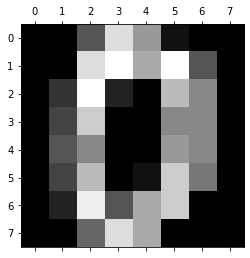

In [25]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

또 100, 1700번째 숫자의 이미지를 그린 아래 그림들을 보라. 각각 어떤 숫자 같은가?

<Figure size 432x288 with 0 Axes>

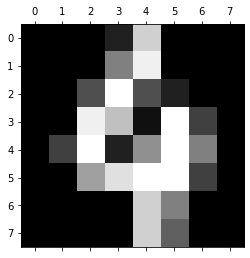

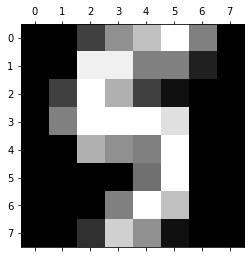

In [26]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[100]) 
plt.matshow(digits.images[1700]) 
plt.show() 

target 값들도 보자.

In [27]:
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


즉 맨 첫번째 숫자는 0이다.

In [28]:
digits.target[0]

0

100번, 1700번 숫자는 4, 5다.

In [29]:
print(digits.target[100], digits.target[1700])

4 5


이제 데이터는 이 정도 살펴보고 교재의 설명으로 돌아가자.

원래 이 데이터에서 target은 10개의 범주를 갖지만(즉 다중 분류 방법을 써서 분류해야할 데이터이지만) 교재의 아래 코드에서는 문제를 `이진 분류`(binary classification)로 간단하게 만들기 위해 숫자가 7인가 아닌가라는 두 범주만 갖는 경우를 다룬다.

In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1) , dtype = bool)

위의 `MyFakeClassifier()` 클래스 안에서 정의한 predict() 함수를 보자. 그 위에 있는 fit() 함수가 아무런 훈련도 하지 않은 엉터리 모형을 만들기 때문에 predict() 함수 역시 그냥 모든 target 데이터를 무조건 0으로 예측 분류한다. 그래서 아예 클래스 이름도 '가짜 fake'라고 지었다. 그런 엉터리 방법이 숫자 데이터를 얼마나 정확하게 분류할 수 있을까?

이 경우 역시 알고리즘 자체의 성능이 아니라 데이터의 분포가 알고리즘의 정확도를 결정한다. 이유를 알아보자. 

In [31]:
digits.target == 7

array([False, False, False, ..., False, False, False])

0부터 9사이의 숫자들이 골고루 들어있다면 그 중에 7은 1/10이고 y값의 비는 9:1 정도일 것이다. 즉 이 데이터는 매우 불균형한 데이터라고 할 수 있다. 확인해보자.

In [32]:
np.bincount(digits.target == 7)

array([1618,  179], dtype=int64)

즉 우리가 예상한 대로 전체 1797개 데이터 중에서 7은 약 10%에 해당하는 179개 뿐이고 나머지는 다른 숫자들이다.

여기서 `(digits.target == 7)` 변수는 digits 숫자 값이 7인지 아닌지를 나타내는 `(즉 True, False값을 갖는)` **bool data**이다. 이 변수를 아래와 같이 1, 0이라는 정수값을 갖는 y 변수로 바꾼 다음 digits.data와 y를 train과 test data로 나누자. 

In [33]:
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

아래에서 확인할 수 있듯 test data에서도 역시 0과 1의 비는 405 : 45 (즉, 9 :1)로서 매우 치우쳐있다.

In [35]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


이제 test data를 가지고 실제 y 값과 예측값(fakepred)이 얼마나 일치하는지 정확도를 구해보자.

In [36]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test , fakepred))

0.9


무조건 모든 예측을 0으로 해버려도 test data에서의 분류 정확도가 무려 90%나 된다! 그러므로 `불균형데이터를 분류할 때에는 정확도를 성능 지표로 써서는 역시 안 되겠다.`

그러므로 다른 평가 지표들을 살펴보자.

- 여기서 수업자료("참고 : 혼동행렬 (오차행렬, confusion matrix)과 머신러닝 모델의 성능 평가")를 보고 다음으로 넘어가자.

정확도, 혼동행렬, 정밀도, 재현율, F1 점수 등의 평가 지표값들은 사이킷런에서 sklearm.metrics 안에 들어있는 다음 함수들을 불러와서 구할 수 있다.

- confusion_matrix
- accuracy_score
- precion_score
- recall_score
- f1_score

## 3.2 혼동행렬 (Confusion Matrix)

교재 153쪽의 그림을 보자. 설명은 기본적으로 이진 분류에 대한 것이다. 암을 예측하는 검사방법이 있다고 하자. 실제 상황은 암이 있거나(양성) 없다(음성). 예측 결과 역시 양성, 음성인데 잘못된 예측을 할 수도 있다.

* TN(true negative) – 음성을 올바르게 예측한 것, 진음성
* TP(true positive) – 양성을 올바르게 예측한 것, 진양성
* FP(false positive) – 음성을 양성으로 잘못 예측한 것, 위양성
* FN(false negative) – 양성을 음성으로 잘못 예측한 것, 위음성

위의 네 가지 결과를 $ 2 \times 2 $ 행렬 모양으로 나타낸 것을 혼동행렬(오차행렬, confusion matrix)라고 한다.

사이킷런에서는 아래와 같이 혼동행렬(오차행렬)을 만들 수 있다.

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

오차행렬은 2차원 넘파이 배열 형태로 출력된다. y 값이 0이면 음성, 1이면 양성이라고 부르자. 위의 결과에 따르면 

    TN = 405, TP = 0, FP = 0, FN = 45

임을 알 수 있다(155쪽 그림을 보라).

실제 양성(7이라는 숫자)이 45개 있지만 모두 음성으로 잘못 분류했다. 결국 양성을 하나도 찾아내지 못했는데도 정확도는 405/450 = 90%가 되었다. 이유는 양성은 적은 반면 음성 데이터가 워낙 많기 때문이다.

**퀴즈**

코로나 검사 대상자들 가운데 양성은 1%라고 해보자. 모든 사람에게 음성 판정을 내리는 검사법의 정확도는 얼마인가? 99%

현실적으로 그런 검사법이 쓸모가 있겠는가? NO

## 3.3 정밀도(Precision)와 재현율(Recall)

** MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

In [38]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


위의 방법의 정확도은 90%였다. 하지만 양성을 전혀 찾아내지 못했기 때문에 정밀도와 재현율은 0이다(TN=405, TP=0, FP=0, FN=45)이므로 사실 재현율은 0/45이지만 정밀도는 0/0이다.(말도 안되는 경우인 것이다)!

편리하게 분석하기 위해 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수를 만들어 놓고 타이타닉 데이터를 분류해보자. 교재에서 예로 들고 있는 분류 알고리즘은 로지스틱회귀 방법이다.

** 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성 **

In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


- 위의 오차행렬을 가지고 정확도, 정밀도, 재현율 계산을 해보고 출력결과와 비교해보라.

### Precision/Recall Trade-off

정밀도와 재현율은 상호보완적이므로 동시에 높일 수 없다. 이유는?

암 검사에서 대부분 양성으로 판정하는 검사법이 있다면 암이 있는 사람은 거의 양성 판정을 받을 것이므로 FN 낮아져 재현율은 높아질 것이다. 하지만 암이 없는 사람 중에 양성 판정을 받는 사람 (위양성)FP이 높아져 정밀도는 낮아질 것이다.

또 대부분을 음성으로 판정하는 검사법이 있다면 많은 실제 암환자를 놓피게 되므로 재현율은 낮아지는 반면 위양성(FP)가 줄어들어 정밀도는 높아질 것이다.

이와 관련해서 target 변수 클래스의 예측확률에 대해 알아보자. 역시 `로지스틱회귀 방법으로 타이타닉 데이터를 분류`한다.

사이킷런에서는 각 데이터에 대해 분류 클래스별 **predict_proba()**를 계산하여 그 값이 큰 클래스로 분류한다.

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


위의 출력을 보면 첫 세 개 데이터가 왜 1,0,0으로 분류되었는지 알 수 있다. 사이킷런은 클래스별 예측확률을 구한 다음 그 확률이 0.5보다 큰 클래스로 데이터를 분류한다. 기준이 꼭 0.5이여야할 이유는? 없다. 교재 161쪽에서 소개하는 **Binarizer** 클래스를 이용하여 우리가 원하는 값으로 바꾸어보자. Binarizer 는 sklearn.preprocessing 안에 들어있는 클래스다.

**Binarizer 활용**

이 클래스는 아래 코드에서 보듯 `2차원 배열을 입력받아 threshold(임계값)보다 크면 1, 아니면 0값을 반환`한다. 그 과정은 **fit()** 과 **transform()** 또는 둘을 합친 **fit_transform()** 메서드를 이용해서 진행된다.

In [11]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

In [12]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


**분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

In [42]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


**여러개의 분류 결정 임곗값을 변경하면서  Binarizer를 이용하여 예측값 변환**

In [43]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


임계값이 커짐에 따라 재현율은 점점 낮아지고 정밀도는 점점 높아진다.

**precision_recall_curve( )를 이용하여 임곗값에 따른 정밀도-재현율 값 추출**

`임계값의 변화에 따른 정밀도와 재현율의 변화를 나타내는 곡선을 그리기 위해 이용하는 함수다.` 실제 target 변수 데이터와 target값이 1(positive label, titanic data의 경우 '생존' 범주를 나타낸다)이 될 예측확률을 입력하면 정밀도, 재현율, 임계값을 출력해준다.

이 함수는 사이킷런의 metrics 모듈에 들어있으므로 `from sklearn.metrics import precision_recall_curve`와 같이 불러서 이용하면 된다.

이 함수에 대한 상세한 설명은 [사이킷런의 설명](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall_curve#sklearn.metrics.precision_recall_curve)을 참조할 것.

계속 titanic 생존자 예측 문제로 연습해보자. 앞에서 우리가 이용한 분류 방법은 로지스틱회귀였다.

In [44]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )

In [45]:
# 반환된 분류 결정 임곗값, precision, recall 배열의 shape을 확인해보자.
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)


어? 왜 갯수가 한 개 차이가 나지? 임계값 하나에 정밀도와 재현율이 하나씩 나와야 맞는데? 오류가 생긴 걸까?

: 의미없다.

사이킷런의 설명을 보자. 

    The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold.

In [47]:
# 임계값, 정밀도, 재현율의 처음 다섯 개 값을 보자.
print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

thresholds 5 sample: [0.10396312 0.10396534 0.10399023 0.10736008 0.10894927]
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [48]:
# 임계값, 정밀도, 재현율의 마지막 다섯 개 값을 보자.
print(thresholds[-5:])
print(precisions[-5:])
print(recalls[-5:])

[0.94891599 0.94916502 0.95070426 0.9519556  0.96515397]
[1. 1. 1. 1. 1.]
[0.08196721 0.06557377 0.04918033 0.03278689 0.        ]


사이킷런 **precision_recall_curve()** 함수는 대략 0.1 ~ 0.97 범위의 임계값에 대해 정밀도와 재현율을 계산해준다. 열 개 정도(step = 15로 두면 된다)의 임계값에 따른 정밀도, 재현율 값을 구해서 대략적인 변화를 살펴보자.

In [50]:
#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


`임계값이 커질수록 정밀도는 높아지고 재현율은 낮아짐을 확인할 수 있다.`

이제 임곗값의 변경에 따른 정밀도, 재현율의 변화를 곡선으로 그려보자(x축의 tick을 교재 그림처럼 만들고 싶으면 코드 중간의 `#`을 지우고 실행). 재현율은 실선으로 정밀도는 `--`으로 나타낸다.

**임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

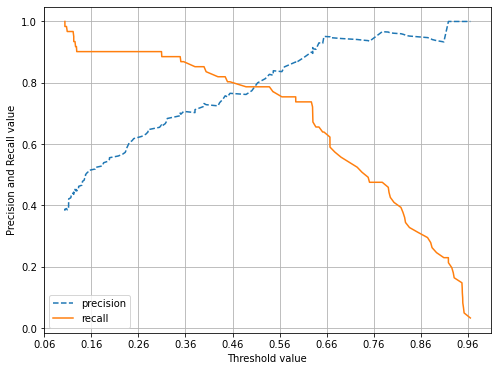

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

만일 재현율과 정밀도 값이 비슷하도록 만들고 싶다면 임계값을 0.5정도로 잡으면 되겠다(교재 167쪽 결과와는 조금 다르다).

## 3.4 F1 Score

In [52]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


앞에서 정의했던 함수 get_clf_eval()에 fi score를 추가하고 **get_eval_by_threshold()** 함수를 실행하여 임계값이 0.4 ~ 0.65 사이의 값일 때 정확도, 정밀도, 재현율, F1 score를 구해보자.

In [54]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, 
                                                                        precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60 , 0.65]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036
임곗값: 0.65
오차 행렬
[[115   3]
 [ 22  39]]
정확도: 0.8603, 정밀도: 0.9286, 재현율: 0.6393, F1:0.7573


임계값이 0.6일 때 F1 score가 가장 높은데, 그렇다고 0.6이 최선의 선택이라는 뜻은 아니다. F1은 높지만 재현율이 낮기 때문이다. `재현율을 강조해야하는 경우라면 F1이 높다고 다 좋은 것은 아니다.`

## 3.5 ROC Curve와 AUC

* ROC curve (Reciever Operation Characteristic curve) : FPR(False Positive Rate, 위양성률)과 TPR(True Positive Rate, 진양성률)의 관계를 나타내는 곡선. 

TPR은 재현율과 같고 **FPR**은 `실제 negative 중에서 양성으로 잘못 분류된 데이터의 비율`을 의미한다.

\$ {\rm TPR = \frac {TP}{FN + TP}}, \$
\$ {\rm FPR = \frac {FP}{FP + TN}} \$

의학 분야에서는 `재현율` = TPR = 진양성률을 '`민감도 `(sensitivity)'라고 부른다.  **/**  또 1 - FPR을 '`특이성`(specificity)' 또는 '`진음성률`(TNR, True Negative Rate)'이라고 부른다.

    재현율 = TPR = 진양성률 = 민감도
    특이성 = 진음성률 = TNR
    FPR = 1 - TNR

이 값들은 0과 1 사이의 값으로 나타내기도 하고 100을 곱해서 백분률로 나타내기도 한다.

교재 **170쪽**의 예시 곡선과 그 곡선에 대한 설명을 잘 읽어보고 아래 질문에 답해보자. 

    x 축의 FPR은 어떻게 0부터 100 사이의 값을 갖게 될까?
    : 임계값이 거의 1에 가까운 경우 ~ 임계값이 0에 가까운 경우이다. 왜냐하면 임계값이 거의 1에 가까운 경우는 양성으로 분류되기란 사실 불가능하기 때문에(FP = 0) FPR은 0에 가까워진다. 또한 임계값이 거의 0에 가까운 경우 음성으로 분류 되기란 사실 불가능하기 때문에(즉, TN = 0) FPR은 100으로 가까워진다.
    
    왜 45도 선이 기준이 될까? 
    : 동전 던지기와 같은 엉터리 방법이기 때문이다.
    
    왜 ROC 곡선은 45도 기준선으로부터 멀수록 좋을까?
    : 45도 기준선은 엉터리 방법으로 가장 성능이 나쁜 것이기 때문에 멀면 멀수록 성능이 좋은 것이다.

앞에서 우리는 임계값이 커지면 양성으로 분류되기 어려워지므로 재현율은 떨어지고 정밀도는 높아진다고 공부했다. 극단적으로 임계값이 거의 1에 가깝다고 해보자. 양성으로 분류되기란 사실 불가능하므로 FPR 값은 아주 낮아질 것이다. TPR 역시 아주 낮을 것이다. ROC 곡선의 왼쪽 끝이 그런 경우다. 한편 임계값이 0에 가까워지면 거의 무조건 양성으로 분류하게 되므로 FPR은 높아진다. ROC 곡선의 오른쪽 끝이 그런 경우다. 

그림의 45도 선은 무엇을 나타낼까? 만일 우리가 머신러닝 분류 알고리즘과 상관없이 동전을 던져서 데이터를 랜덤하게 양성, 음성으로 분류한다고 해보자. 진짜 양성 가운데 절반은 양성, 절반은 음성으로 분류될 것이다. 진짜 음성도 마찬가지다. 이럴 때 TPR, FPR은 각각 얼마일까? 모두 0.5가 된다. 
만일 그 동전이 앞뒷면이 8:2로 나오는 동전이라면 TPR, FPR 값이 어떻게 될까? 모두 0.8이 된다. 

그런데 이런 분류도 괜찮을까? 당연히 가장 나쁜 분류방법이다. `즉 45도 선은 모든 분류 방법보다 성능이 떨어지는 최악의 분류방법을 이용할 때 나타나는 ROC 곡선이므로 다른 분류법의 성능을 평가하는 기준선 역할을 할 수 있다.` 따라서 ROC 곡선을 그렸을 때 45도 선에서 `멀수록 그 분류방법은 좋은 방법`이며 달리 표현하면 ROC 곡선 아래의 면적(AUC 값)이 클수록 좋은 방법이다.    

사이킷런에서 ROC 곡선을 그리기 위한 FPR, TPR 값은 metrics 모듈 안에 있는 **roc_curve()** 함수를 이용해서 구할 수 있다. 이 함수는 실제 target 변수 데이터와 양성 예측 확률(predict_proba)을 입력받아 FPR, TPR 값과 임계값을 계산해준다.

In [55]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

아래에서 보듯 thresholds의 첫번째 값은 max(예측확률)+1로 임의로 설정된 `부적절한 값이므로 제외시킬 필요가 있다.` (확률이기 때문에 1보다 클 수 없다.)

In [56]:
thresholds

array([1.96515397, 0.96515397, 0.91852728, 0.90889602, 0.77808684,
       0.75101644, 0.65427068, 0.65152826, 0.6435831 , 0.63710005,
       0.63077352, 0.63032556, 0.63030945, 0.62749053, 0.59433725,
       0.59424326, 0.56489504, 0.54671594, 0.54615549, 0.53837583,
       0.48878055, 0.45460491, 0.44937119, 0.44446369, 0.42908986,
       0.39944076, 0.38026262, 0.35628953, 0.35025972, 0.34886453,
       0.30974878, 0.30917003, 0.2406261 , 0.23471422, 0.14775389,
       0.14775358, 0.12913759, 0.12849758, 0.12659557, 0.12541369,
       0.1227685 , 0.12276362, 0.12270865, 0.12141462, 0.11209169,
       0.11205751, 0.11169063, 0.11164519, 0.10894927, 0.10736008,
       0.10396534, 0.10396312, 0.01162433])

index 0에 해당하는 첫번째 값을 제외하고 열 개 정도만 골라서 값들의 패턴을 살펴보자.

In [57]:
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR:  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


위의 결과를 보면 ROC 곡선은 `임계값이 1부터 0까지 변함`에 따라 커지는 FPR값을 x 축에 두고 TPR값을 y 축에 그린 것이다.

* AUC : Area Under Curve

`ROC 곡선 아래의 면적을 뜻하며 값이 클수록 좋다`. 사이킷런에서는 metrics 모듈 안에 있는 **roc_auc_score()** 함수로 구할 수 있다.

In [49]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


마지막으로 AUC 값까지 나오도록 `get_clf_eval()` 함수를 다시 정의해서(`pred_proba`가 함수 인자로 추가되었다) 출력해 보자.

In [59]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [62]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
get_clf_eval(y_test, pred, pred_proba[:,1].reshape(-1,1))

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869,    F1: 0.7805, AUC:0.9024


교재 3.6절(Pima Indian Diabetes data 분석)은 생략.

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

In [ ]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 
#해당하는 ndarray입니다. 

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))